# **Importar Datos**

In [0]:
import pandas as pd
import numpy as np

In [0]:
df_lineo=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRDzLf36WF7fwhkzQMEH1HE9OMHhJuwR6wXuQCkPJygaadlqdt4ZK582BG_762JrwxwmI7nIuvpW0oC/pub?gid=410360197&single=true&output=csv')  
df_Mercado_libre =pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTwWbw5PBrxm6dUTEmRW6aQGf9gc_TgEt2ziDnHNzjKqGg2AlXDWFDnBxSB1GmsVPdqjU33JuS0j9W0/pub?gid=844185965&single=true&output=csv')  
df_alkosto =pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQxKsBzwrifVJdR_9cdjhVbSExhhFvfIzpmntNxNI7DMapYxw5QbcuF_thRP1-9MMvzVddEePAXK5TN/pub?gid=155685023&single=true&output=csv')  

**Asignar df a analizar**

In [11]:
df_diff = df_alkosto.copy()
df_diff.head(5)

,title,brank,price,color,opinions,average_opinions,raw_description,seller,url
0,Celular XIAOMI REDMI 8A 32GB Negro,419900.0,419900.0,NaN,2.0,5.0,\n\nEl potente 8A te brindará un rendimiento ó...,Alkosto,http://www.alkosto.com/celular-xiaomi-redmi-8a...
1,Celular XIAOMI REDMI Note 8 Pro 128GB Verde,1399900.0,1399900.0,Verde,2.0,5.0,\n\nXiaomi con su Note 8 Pro quiere que recuer...,Alkosto,http://www.alkosto.com/celular-xiaomi-redmi-no...
2,Celular MOTOROLA G8 Plus 64GB Rojo,749900.0,749900.0,Bateria Recargable Interna,133.0,5.0,\n\nTodo nuevo para ti.\nSensor 48 MPX + Night...,Alkosto,http://www.alkosto.com/celular-motorola-g8-plu...
3,iPhone 7 32GB Negro Mate,1499000.0,1499000.0,Negro,65.0,5.0,\n\niPhone 7Pantalla: 4.7 HD RetinaCámara: 12 ...,Alkosto,http://www.alkosto.com/iphone-7-32gb-negro-mate
4,Celular MOTOROLA ONE HYPER 128GB Azul,1349900.0,1349900.0,Azul,5.0,4.0,\n\nCaptura increíbles detalles aún con poca l...,Alkosto,http://www.alkosto.com/celular-motorola-one-hy...


# **Importando Colores de Wikipedia**

In [0]:
import requests
from bs4 import BeautifulSoup

def get_query(url:str, selector:str):
  data = []
  try:   
    response = requests.get(url)
    response.raise_for_status()

    if response: 
        soup = BeautifulSoup(response.text, "html.parser")
        return soup.select(selector)
    return []
  except:
    return []

def getColors(resuts_colors):
    colors = []
    for c in resuts_colors:
      color = c['title']
      if color.find(':') < 0:
        color = color.replace(' (color)','').lower().rstrip()
        colors.append(color)
    return list(set(colors))

def _valid_color(colors:str, color: str)-> bool :
  if string_colors.find(color.strip().lower()) < 0:
    return False
  return True

url_colors = 'https://es.wikipedia.org/wiki/Anexo:Colores_por_orden_alfab%C3%A9tico'
selector = "#mw-content-text > div > p > a[title]"

colors = get_query(url_colors, selector)
colors = getColors(colors)
colors.sort()
string_colors = ",".join(colors)

# Validar y remplazar colores desconocidos **Dataframe**

In [5]:
df_temp = df_diff.loc[:,['color']]

mask=[]
for c in df_temp['color']:
  if _valid_color(str(string_colors), str(c)) and len(c) <= 15:
    mask.append(False)
  else:
    mask.append(True)  

df_temp[mask] = np.NaN
df_diff['color'] = df_temp
df_diff[23:27]


,title,brank,price,color,opinions,average_opinions,raw_description,seller,url
23,Celular XIAOMI MI NOTE 10 128GB Blanco,2.499.900,2499900,SI,1.0,4.0,\n Bienvenido a la ...,Alkosto,http://www.alkosto.com/celular-xiaomi-mi-note-...
24,iPhone 11 Pro 64 GB de en verde noche,4.929.000,4929000,NaN,3.0,5.0,\n\nEl nuevo iPhone 11 Pro tiene un sistema de...,Alkosto,http://www.alkosto.com/iphone-11-pro-64-gb-de-...
25,Celular SAMSUNG Galaxy S20 Ultra 128GB Gris,5.499.090,5499090,NaN,NaN,NaN,\n El teléfono que ...,Alkosto,http://www.alkosto.com/celular-samsung-galaxy-...
26,iPhone 11 64 GB en amarillo,3.449.000,3449000,NaN,NaN,NaN,\n\nEl nuevo iPhone 11 tiene un sistema de dos...,Alkosto,http://www.alkosto.com/iphone-11-64-gb-en-amar...


# Validar y remplazar **opiniones**

**Validando captura de datos**

In [6]:
import re

def get_nums(e:str):
  result = re.findall(r'[\d]+\s', e)
  if result:
    return int(result[0])
  return np.NaN

missing_opinions_mask = df_diff['opinions'].notna()

df_diff[missing_opinions_mask]['opinions']

0        2.0
1        2.0
2      133.0
3       65.0
4        5.0
       ...  
132     43.0
133      1.0
134      4.0
135      2.0
136      9.0
Name: opinions, Length: 106, dtype: float64

# Validar Seller

In [7]:
missing_seller_mask = df_diff['seller'].notna()

missing_seller=(df_diff[missing_seller_mask]['seller']
        .apply(lambda seller: list(seller))
        .apply(lambda letters: list(map(lambda letter: letter.replace('\n', ' '), letters)))
        .apply(lambda letters: ''.join(letters))
        .apply(lambda word: word.strip())
        .apply(lambda seller: re.sub('\S+\/','',seller))
        .apply(lambda seller: re.sub('\W',' ',seller))
)

df_diff.loc[missing_seller_mask, 'seller'] = missing_seller
df_diff


,title,brank,price,color,opinions,average_opinions,raw_description,seller,url
0,Celular XIAOMI REDMI 8A 32GB Negro,419.9,"$419,900.00",NaN,2.0,5.0,\n\nEl potente 8A te brindará un rendimiento ó...,Alkosto,http://www.alkosto.com/celular-xiaomi-redmi-8a...
1,Celular XIAOMI REDMI Note 8 Pro 128GB Verde,1.399.900,1399900,Verde,2.0,5.0,\n\nXiaomi con su Note 8 Pro quiere que recuer...,Alkosto,http://www.alkosto.com/celular-xiaomi-redmi-no...
2,Celular MOTOROLA G8 Plus 64GB Rojo,749.9,"$749,900.00",NaN,133.0,5.0,\n\nTodo nuevo para ti.\nSensor 48 MPX + Night...,Alkosto,http://www.alkosto.com/celular-motorola-g8-plu...
3,iPhone 7 32GB Negro Mate,1.499.000,1499000,Negro,65.0,5.0,\n\niPhone 7Pantalla: 4.7 HD RetinaCámara: 12 ...,Alkosto,http://www.alkosto.com/iphone-7-32gb-negro-mate
4,Celular MOTOROLA ONE HYPER 128GB Azul,1.349.900,1349900,Azul,5.0,4.0,\n\nCaptura increíbles detalles aún con poca l...,Alkosto,http://www.alkosto.com/celular-motorola-one-hy...
...,...,...,...,...,...,...,...,...,...
132,Celular ASUS Zenfone Max M2 32G 4G Negro,469.9,"$469,900.00",Negro,43.0,5.0,\n El nuevo ZenFone...,Alkosto,http://www.alkosto.com/celular-asus-zenfone-m2...
133,Celular iPhone XS Max 64 GB 4G Plata,4.749.000,4749000,NaN,1.0,5.0,\n\nBienvenido a la pantalla más grande en un ...,Alkosto,http://www.alkosto.com/celular-iphone-xs-max-6...
134,Celular SAMSUNG GaLaxy A51 - 128GB Azul,1.299.900,1299900,NaN,4.0,5.0,\n\nDisfruta del mejor contenido con el displa...,Alkosto,http://www.alkosto.com/celular-samsung-galaxy-...
135,Celular XIAOMI REDMI Note 8 Pro 128GB Gris,1.399.900,1399900,Gris,2.0,5.0,\n\nXiaomi con su Note 8 Pro quiere que recuer...,Alkosto,http://www.alkosto.com/celular-xiaomi-redmi-no...


# Validar price

In [12]:
missing_price_mask = df_diff['price'].notna()

missing_price =(df_diff[missing_price_mask]['price']
        .apply(lambda seller: list(seller))
        .apply(lambda letters: list(map(lambda letter: letter.replace('n', ''), letters)))
        .apply(lambda letters: list(map(lambda letter: letter.replace('$', ' '), letters)))
        .apply(lambda letters: list(map(lambda letter: letter.replace('.', ''), letters)))
        .apply(lambda letters: list(map(lambda letter: letter.replace('\\', ''), letters)))
        .apply(lambda letters: ''.join(letters))
        .apply(lambda word: int(word.strip()))
)

df_diff.loc[missing_price_mask, 'price'] = missing_price
df_diff



TypeError: ignored

# **Validando dataframe**

In [13]:
#contar en numero de filas de la columna marca
row_count_branks = df_diff.index.stop

#contar el numero de datos por columna y crear nuevo dataframe
df_count_data = pd.DataFrame(df_diff.count(axis=0) , columns=['amount_data'])

#Validar porcentaje de datos
percentage_serie =[round(item/row_count_branks*100,2) for item in df_count_data['amount_data']]
percentage_error = list(pd.Series([100]* len(df_count_data.index)) - pd.Series(percentage_serie))

#agregar columnas al dataset
df_count_data['percentage'] = percentage_serie
df_count_data['percentage_error'] = percentage_error

#Ordenar por porcentaje de error
df_count_data.sort_values(by='percentage_error',ascending=False)


,amount_data,percentage,percentage_error
opinions,106,77.37,22.63
average_opinions,106,77.37,22.63
color,111,81.02,18.98
brank,132,96.35,3.65
price,132,96.35,3.65
title,137,100.00,0.00
raw_description,137,100.00,0.00
seller,137,100.00,0.00
url,137,100.00,0.00


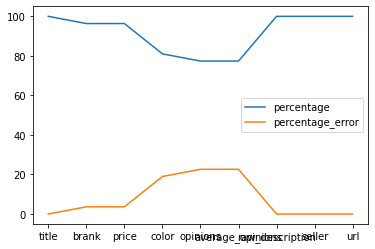

In [14]:
#Graficar analisis
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

df_count_data[['percentage','percentage_error']].plot()

In [0]:

cmap = ListedColormap([ "green", "red"])
linestyles = ['-', '-', '--', '-.', ':']
plot=df_count_data[['percentage','percentage_error']].plot(
    grid=True,
    title='Data Capture Results',
    use_index=True, 
    style=linestyles,
    xticks= np.arange(start=1, stop=10, step=1),
    yticks= np.arange(start=1, stop=100, step=5),
    xlim=[0,8],
    ylim=[0,100],
    rot=90,
    fontsize= 10,
    colormap=cmap
)
print('Colormaps: {}'.format(plt.colormaps()))


# Analisis Color

In [15]:
#optener columnas con error superior al 10%
mask = df_count_data[df_count_data['percentage_error'] > 10].index

#agregar url
mask = list(mask)
mask.append('url')

#filtar NaN
t=df_diff[mask].isna()
mask_nan_color =df_diff['color'].isna()
list(df_diff[mask_nan_color]['url'])[:10]

['http://www.alkosto.com/celular-xiaomi-redmi-8a-32gb-negro',
 'http://www.alkosto.com/iphone-11-pro-max-64-gb-gris-espacial',
 'http://www.alkosto.com/iphone-11-pro-64-gb-gris-espacial',
 'http://www.alkosto.com/iphone-11-pro-64-gb-de-en-verde-noche',
 'http://www.alkosto.com/iphone-11-64-gb-en-amarillo',
 'http://www.alkosto.com/iphone-11-64-gb-en-negro',
 'http://www.alkosto.com/iphone-11-64-gb-en-verde',
 'http://www.alkosto.com/iphone-11-pro-max-256-gb-de-en-verde-noche',
 'http://www.alkosto.com/iphone-11-pro-64-gb-plata',
 'http://www.alkosto.com/iphone-11-128-gb-en-negro']

Al validar los enlaces se evidencia que este dato no siempre viene en los articulos, la pagina no nos ofrece una estructura estable para optener esta información directamentamente, se debe buscar una nueva estrategia para la captura de este dato.

In [16]:
#filtar NaN
mask_nan_comments =df_diff['opinions'].isna()
list(df_diff[mask_nan_comments]['url'])[10:110]

['http://www.alkosto.com/celular-samsung-galaxy-zflip-256gb-negro-mirror-black-galaxy-buds-plus-negro',
 'http://www.alkosto.com/combo-celular-huawei-y7p-64gb-negro-midnight-black-audifono-am61',
 'http://www.alkosto.com/combo-celular-huawei-p40-pro-256gb-azul-deep-sea-blue-freebus-3-y9-prime',
 'http://www.alkosto.com/iphone-11-pro-64-gb-oro',
 'http://www.alkosto.com/celular-lg-k61-128gb-blanco',
 'http://www.alkosto.com/celular-samsung-galaxy-note-10-plus-ds-256-gb-plateado-1',
 'http://www.alkosto.com/celular-iphone-xs-512gb-4g-plata',
 'http://www.alkosto.com/iphone-11-pro-max-256-gb-gris-espacial',
 'http://www.alkosto.com/celular-lg-k61-128gb-gris',
 'http://www.alkosto.com/celular-samsung-galaxy-note-10-plus-ds-256-gb-blanco-1',
 'http://www.alkosto.com/celular-iphone-xs-max-512gb-4g-plata',
 'http://www.alkosto.com/iphone-11-pro-max-64-gb-oro',
 'http://www.alkosto.com/celular-samsung-galaxy-fold-512gb-plateado',
 'http://www.alkosto.com/celular-lg-k41s-32gb-negro',
 'http://w

Se evidencia que los articulos no cuantan con opiniones, pero se evidencia accesorios y otros tipos de articulos que no corresponden con celulares, se corrige el enlace principal con ayuda de filtros de pagina


In [17]:
mask_nan_comments =df_diff['average_opinions'].isna()
list(df_diff[mask_nan_comments]['url'])[10:110]

['http://www.alkosto.com/celular-samsung-galaxy-zflip-256gb-negro-mirror-black-galaxy-buds-plus-negro',
 'http://www.alkosto.com/combo-celular-huawei-y7p-64gb-negro-midnight-black-audifono-am61',
 'http://www.alkosto.com/combo-celular-huawei-p40-pro-256gb-azul-deep-sea-blue-freebus-3-y9-prime',
 'http://www.alkosto.com/iphone-11-pro-64-gb-oro',
 'http://www.alkosto.com/celular-lg-k61-128gb-blanco',
 'http://www.alkosto.com/celular-samsung-galaxy-note-10-plus-ds-256-gb-plateado-1',
 'http://www.alkosto.com/celular-iphone-xs-512gb-4g-plata',
 'http://www.alkosto.com/iphone-11-pro-max-256-gb-gris-espacial',
 'http://www.alkosto.com/celular-lg-k61-128gb-gris',
 'http://www.alkosto.com/celular-samsung-galaxy-note-10-plus-ds-256-gb-blanco-1',
 'http://www.alkosto.com/celular-iphone-xs-max-512gb-4g-plata',
 'http://www.alkosto.com/iphone-11-pro-max-64-gb-oro',
 'http://www.alkosto.com/celular-samsung-galaxy-fold-512gb-plateado',
 'http://www.alkosto.com/celular-lg-k41s-32gb-negro',
 'http://w

In [22]:
mask_nan_comments =df_diff['seller'].isna()
list(df_diff[mask_nan_comments]['url'])[10:110]
df_diff

,title,brank,price,color,opinions,average_opinions,raw_description,seller,url
0,Celular XIAOMI REDMI 8A 32GB Negro,419900.0,419900.0,NaN,2.0,5.0,\n\nEl potente 8A te brindará un rendimiento ó...,Alkosto,http://www.alkosto.com/celular-xiaomi-redmi-8a...
1,Celular XIAOMI REDMI Note 8 Pro 128GB Verde,1399900.0,1399900.0,Verde,2.0,5.0,\n\nXiaomi con su Note 8 Pro quiere que recuer...,Alkosto,http://www.alkosto.com/celular-xiaomi-redmi-no...
2,Celular MOTOROLA G8 Plus 64GB Rojo,749900.0,749900.0,Bateria Recargable Interna,133.0,5.0,\n\nTodo nuevo para ti.\nSensor 48 MPX + Night...,Alkosto,http://www.alkosto.com/celular-motorola-g8-plu...
3,iPhone 7 32GB Negro Mate,1499000.0,1499000.0,Negro,65.0,5.0,\n\niPhone 7Pantalla: 4.7 HD RetinaCámara: 12 ...,Alkosto,http://www.alkosto.com/iphone-7-32gb-negro-mate
4,Celular MOTOROLA ONE HYPER 128GB Azul,1349900.0,1349900.0,Azul,5.0,4.0,\n\nCaptura increíbles detalles aún con poca l...,Alkosto,http://www.alkosto.com/celular-motorola-one-hy...
...,...,...,...,...,...,...,...,...,...
132,Celular ASUS Zenfone Max M2 32G 4G Negro,469900.0,469900.0,Negro,43.0,5.0,\n El nuevo ZenFone...,Alkosto,http://www.alkosto.com/celular-asus-zenfone-m2...
133,Celular iPhone XS Max 64 GB 4G Plata,4749000.0,4749000.0,NaN,1.0,5.0,\n\nBienvenido a la pantalla más grande en un ...,Alkosto,http://www.alkosto.com/celular-iphone-xs-max-6...
134,Celular SAMSUNG GaLaxy A51 - 128GB Azul,1299900.0,1299900.0,Bateria Recargable Interna,4.0,5.0,\n\nDisfruta del mejor contenido con el displa...,Alkosto,http://www.alkosto.com/celular-samsung-galaxy-...
135,Celular XIAOMI REDMI Note 8 Pro 128GB Gris,1399900.0,1399900.0,Gris,2.0,5.0,\n\nXiaomi con su Note 8 Pro quiere que recuer...,Alkosto,http://www.alkosto.com/celular-xiaomi-redmi-no...


Se evidencia que los productos no cuentan con informacion del vendedor. pero algunos estan comentados, se aprueba este feature el cual nos puede dar informacion relevante acerca de este tipo de vendedores